In [13]:
import pandas as pd

df = pd.read_csv('trajectory_monitoring_position.csv')
df_cmd = pd.read_csv('trajectory_monitoring_cmd.csv')
df_cmd_duration = pd.read_csv('trajectory_monitoring_cmd_duration.csv')

df['time_since_start'] = df['timestamp'] - df['timestamp'].iloc[0]
df_cmd['time_since_start'] = df_cmd['timestamp'] - df['timestamp'].iloc[0]

In [20]:
import matplotlib.pyplot as plt

def plot_motor_movement(motor):
    plt.figure()
    plt.plot(df['time_since_start'], df[motor], label='response '.format(motor))

    command = df_cmd[motor].to_list()
    start_time = df_cmd['time_since_start'].to_list()
    duration = df_cmd_duration[motor].to_list()

    starting_position = df[df['time_since_start']<start_time[0]][motor].iloc[-1]
    points = [(start_time[0], starting_position)]
    points.append((start_time[0]+duration[0]/1000, command[0]))
    for idx, cmd_position in enumerate(command[1:]):
        true_idx = idx + 1
        points.append((start_time[true_idx], command[true_idx-1]))
        points.append((start_time[true_idx]+duration[true_idx]/1000, cmd_position))
    points.append((df['time_since_start'].iloc[-1], cmd_position))

    # Extract x and y values from points
    x_values = [point[0] for point in points]
    y_values = [point[1] for point in points]
    # Plot the points and connect them with straight lines
    plt.plot(x_values, y_values, 'or--', label='reference')

    plt.legend()
    plt.xlabel('time since start (seconds)')
    plt.ylabel('position (degrees)')
    plt.title('{} movement'.format(motor))
    plt.grid(True)

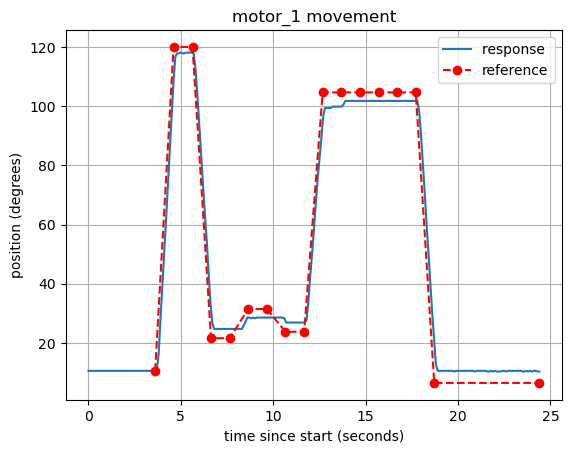

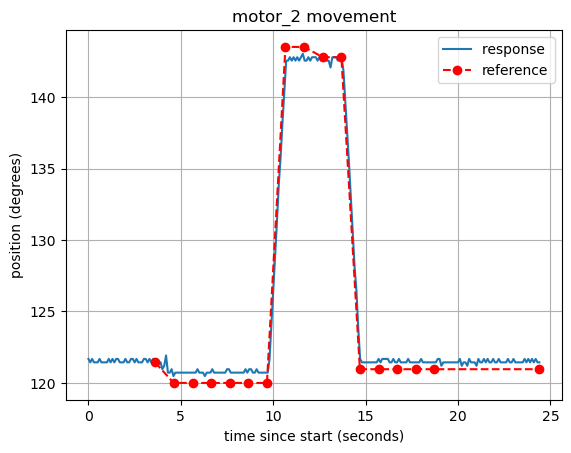

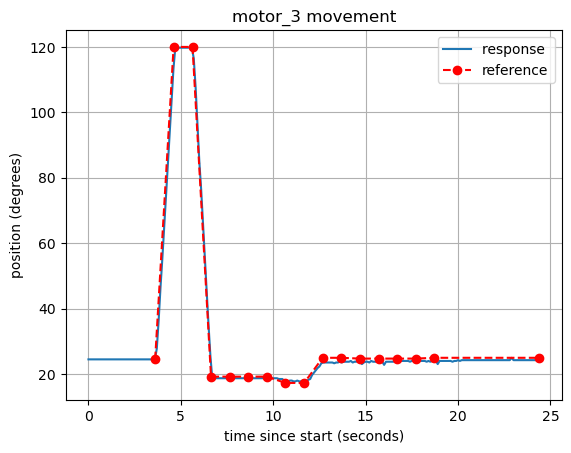

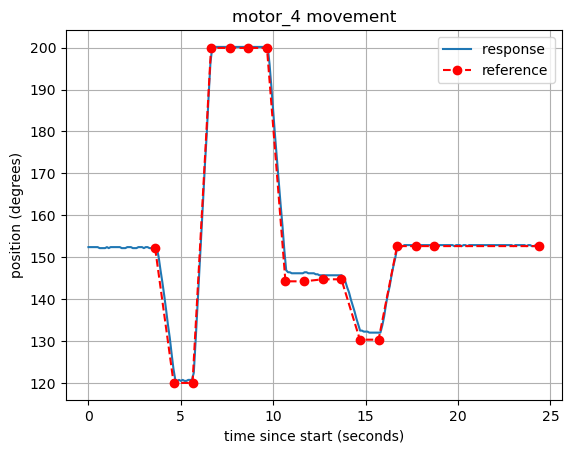

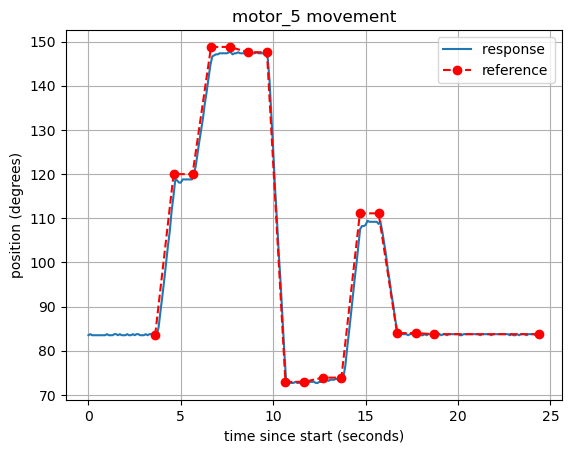

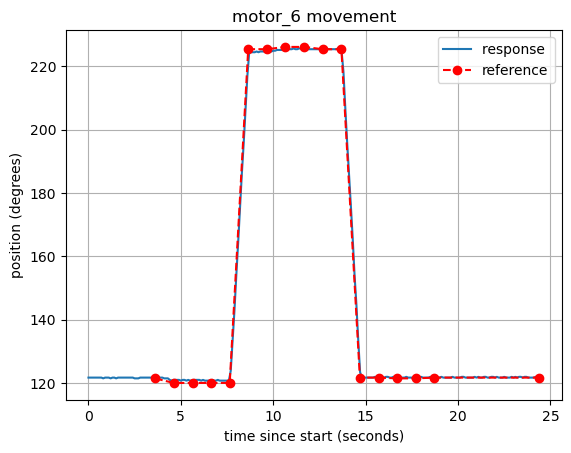

In [21]:
for i in range(1, 7):
    plot_motor_movement('motor_' + str(i))